In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
transaction_df = pd.read_csv('Processed_Transactions.csv')

In [36]:
#describe the dataframe

print(transaction_df.dtypes)

TRANSACTION_ID                  object
ACCOUNT_TYPE                     int64
TRANSACTION_CODE                 int64
TRANSACTION_DATE                object
TRANSACTION_CURRENCY            object
TRANSACTION_CURRENCY_AMOUNT    float64
TRANSACTION_AMOUNT             float64
TRANSACTION_ACCOUNT              int64
TRANSACTION_CUSTOMER             int64
TRANSACTION_DEBIT_CREDIT         int64
CUSTOMER_FISCAL_COUNTRY         object
CUSTOMER_BIRTH_COUNTRY         float64
CUSTOMER_BIRTH_CITY            float64
CUSTOMER_BIRTH_DATE             object
CUSTOMER_OCCUPATION             object
CUSTOMER_RISK_SCORE              int64
CUSTOMER_ONBOARD_DATE           object
ACCOUNT_CURRENT_BALANCE        float64
ACCOUNT_CURRENCY                object
ACCOUNT_OPEN_DATE               object
dtype: object


### Converting 'TRANSACTION_DATE' from 'datetime' to timestamp

In [28]:
transaction_df['TRANSACTION_DATE']=pd.to_datetime(transaction_df['TRANSACTION_DATE'])
transaction_df['TRANSACTION_DATE'] = transaction_df['TRANSACTION_DATE'].apply(lambda x:x.timestamp())
transaction_df['TRANSACTION_DATE']=transaction_df['TRANSACTION_DATE'].astype(int)

print(transaction_df['TRANSACTION_DATE'].head())

0    1690761600
1    1697068800
2    1642032000
3    1637625600
4    1640563200
Name: TRANSACTION_DATE, dtype: int32


### Converting 'TRANSACTION_DATE' column from object to int

In [29]:
transaction_df['TRANSACTION_DATE'] = transaction_df['TRANSACTION_DATE'].astype(int)

In [30]:
additional_percentiles=[0.90, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
print(transaction_df.select_dtypes(include='number').describe(percentiles=additional_percentiles).round(2))

       ACCOUNT_TYPE  TRANSACTION_CODE  TRANSACTION_DATE  \
count      45878.00          45878.00      4.587800e+04   
mean        5683.53           2986.42      1.670584e+09   
std          817.75           2172.45      2.929049e+07   
min         1001.00              1.00      1.628813e+09   
50%         6003.00           5025.00      1.669982e+09   
90%         6003.00           5044.00      1.707696e+09   
92%         6003.00           5044.00      1.709251e+09   
93%         6003.00           5044.00      1.709856e+09   
94%         6003.00           5045.00      1.710720e+09   
95%         6003.00           5045.00      1.711066e+09   
96%         6003.00           5045.00      1.711584e+09   
97%         6003.00           5045.00      1.712534e+09   
98%         6003.00           5045.00      1.712880e+09   
99%         6003.00           5045.00      1.713418e+09   
max         6008.00           5045.00      1.715904e+09   

       TRANSACTION_CURRENCY_AMOUNT  TRANSACTION_AMOUNT 

In [37]:

#account_id = 10000000127
amount_summary=transaction_df.groupby('TRANSACTION_ACCOUNT')['TRANSACTION_CURRENCY_AMOUNT'].describe(percentiles=additional_percentiles).round(2)
# print(amount_summary.loc[account_id, '98%'])
#print(amount_summary['99%'])

for transaction_index, transaction_row in transaction_df.iterrows():
    if transaction_df.loc[transaction_index,'TRANSACTION_CURRENCY_AMOUNT'] > amount_summary.loc[transaction_df.loc[transaction_index, 'TRANSACTION_ACCOUNT'],'99%'] and transaction_df.loc[transaction_index,'CUSTOMER_RISK_SCORE']>60:
        transaction_df.loc[transaction_index,'FRAUD'] = 1
    else:
        transaction_df.loc[transaction_index,'FRAUD'] = 0

print(transaction_df['FRAUD'].value_counts())

FRAUD
0.0    45113
1.0      765
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

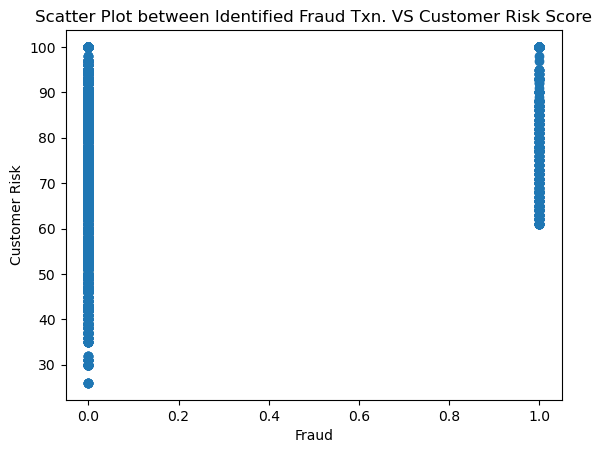

In [38]:
x=transaction_df['FRAUD']
y=transaction_df['CUSTOMER_RISK_SCORE']

plt.title('Scatter Plot between Identified Fraud Txn. VS Customer Risk Score')
plt.xlabel('Fraud')
plt.ylabel('Customer Risk')

plt.scatter(x,y)
plt.show

In [39]:
transaction_df.to_csv('classified_transactions.csv', index=False)